## HW1 (alternative)

Показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется $O(\frac 1 m + \frac L p)$. Подробнее в материалах лекции.

Построить **графики зависимости FPR от длинны строк L и простого модуля p**.

Эксперименты провести для `L = np.linspace(10, 100, 11)` и 10 простых чисел p из интервала `(100, 1000)`.
**Для каждой точки выполнить 10 экспериментов**, на графике отобразить стандартное отклонение оценки в каждой точке.

В коде добавлены доп. пояснения, которые давал Денис Владимирович.

### [The 1st seminar](https://github.com/thedenaas/hse_seminars_2018/blob/master/seminar_1/algorithms.ipynb):

# Hashing functions

## Universal Family of hash functions

Family of hash functions $H= \{\; h: X \rightarrow [0, m-1] \; \}$ is called universal family if

$Pr[\;h(x) = h(y) | x \neq y\;] \leq \frac 1 m $ for some $h$ taken random from $H$

## Hashing intergers
For some prime number $p$ and $ a \in [1, p-1], \; b \in [0, p-1] $

$ H_p = \{ \; h_p^{a,b}(x) = (ax+b) \; (mod \; p) \; \}$,

In [1]:
def hash_int(x, a=112, b=22, p=997):
    return (a*x + b) % p

## Hashing strings
For some big prime number $p$ and string S and $x \in [1, p-1]$

$P_p = \{ \; h_p^x(S) = \sum^{|S|-1}_{j=0} s_j \:  x^j \; (mod \;  p) \; \}$

In [2]:
def poly_hash(s, p=997, x=31):
    h = 0
    for j in range(len(s)-1, -1, -1):
        h = (h * x + ord(s[j]) + p) % p
    return h

___

In [3]:
import numpy as np
import random
import string
import matplotlib.pyplot as plt

%matplotlib inline

Эксперименты провести для `L = np.linspace(10, 100, 11)`

In [4]:
L = np.linspace(10, 100, 11)

In [5]:
L

array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.])

и 10 [простых чисел](https://www.geeksforgeeks.org/python-program-to-print-all-prime-numbers-in-an-interval/) `p` из интервала `(100, 1000)`

In [6]:
def primes(lower=100, upper=1000):
    primes = []
    for val in range(lower, upper + 1): 
        if val > 1: 
            for n in range(2, val): 
                if (val % n) == 0: 
                    break
            else: 
                primes.append(val)

    return random.sample(primes, 10)

In [13]:
p_10 = sorted(primes())

In [14]:
p_10

[199, 223, 569, 593, 683, 827, 857, 859, 877, 953]

Каждый эксперимент состоит из того, что ты генерируешь скажем **1000 разных строк длины L** и смотришь совпадения хешей между ними.
**Все строки в эксперименте разные**.
В каждом эксперименте **`seed` с которым ты генерируешь строки должен быть разным.**

In [15]:
def random_generator(seed=42, n=1000, size=6, chars=string.ascii_uppercase):
    random.seed(seed)
    random_strings = []
    
    for i in range(n):
        random_strings.append(''.join(random.choice(chars) for x in range(size)))
        
    return random_strings

In [16]:
seeds = random.sample(range(500), 11)

In [17]:
seeds

[279, 361, 117, 125, 47, 266, 240, 412, 79, 49, 432]

___

Соответственно твой `FPR = # коллизий * 2 / (1000 * (1000-1))`.

In [18]:
def FPR(seed, rand_L, p, n):
    hashes = {}
    num_col = 0

    random_strings = random_generator(seed=seed, n=n, size=rand_L, chars=string.ascii_uppercase)

    for rand_s in random_strings:
        hash = poly_hash(rand_s, p, x=31)

        if hash not in hashes:
            hashes[hash] = rand_s

        else:
            hashes[hash] = rand_s
            num_col += 1
                
    return num_col * 2 / (n * (n - 1))

Фиксируешь `p` и проводишь по 10 экспериментов для 11 разных `L`.

In [24]:
p = random.choice(p_10)

In [25]:
means_fixed_p = []
stds_fixed_p = []

print('p = %d' % p)

for l in L:
    fprs = []
    
    for seed in seeds:
        fpr = FPR(seed, int(l), p, 1000)
        fprs.append(fpr)
    
    means_fixed_p.append(np.mean(fprs))
    stds_fixed_p.append(np.std(fprs))

p = 877


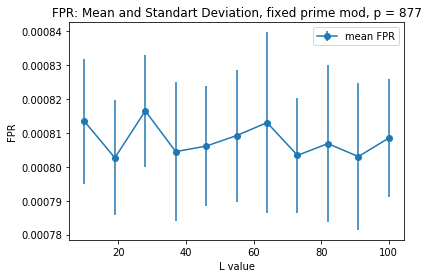

In [26]:
plt.errorbar(L, means_fixed_p, stds_fixed_p, fmt='-o', label='mean FPR')
plt.title('FPR: Mean and Standart Deviation, fixed prime mod, p = %d' % p)
plt.xlabel('L value')
plt.ylabel('FPR')
plt.legend()
plt.show()

In [27]:
means_fixed_p = []
stds_fixed_p = []

p = 503
print('p = %d' % p)

for l in L:
    fprs = []
    
    for seed in seeds:
        fpr = FPR(seed, int(l), p, 1000)
        fprs.append(fpr)
    
    means_fixed_p.append(np.mean(fprs))
    stds_fixed_p.append(np.std(fprs))

p = 503


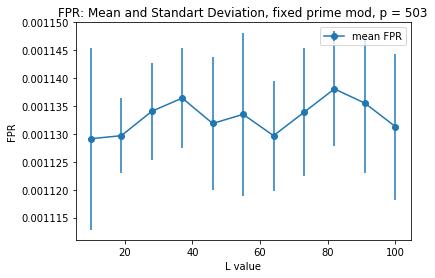

In [28]:
plt.errorbar(L, means_fixed_p, stds_fixed_p, fmt='-o', label='mean FPR')
plt.title('FPR: Mean and Standart Deviation, fixed prime mod, p = %d' % p)
plt.xlabel('L value')
plt.ylabel('FPR')
plt.legend()
plt.show()

Ожидался рост коллизий при возрастании длины строк ($O(\frac 1 m + \frac L p)$), однако мы не можем с точностью сказать этого, исходя из получившегося графика, посколько функция не монотонна. Если рассматривать отдельные части графика, то мы действительно получаем рост коллизий с увеличением значения параметра `L` (и, вероятнее всего, не быстрее линейного).

Потом фиксируешь `L` и проводишь по 10 экспериментов для 10 разных `p` из указанного интервала.

In [29]:
rand_L = int(random.choice(L))

In [30]:
means_fixed_L = []
stds_fixed_L = []

print('L = %d' % rand_L)

for p in p_10:
    rand_L = rand_L
    fprs = []
    
    for seed in seeds[:-1]:
        fpr = FPR(seed, rand_L, p, 1000)
        fprs.append(fpr)
    
    means_fixed_L.append(np.mean(fprs))
    stds_fixed_L.append(np.std(fprs))

L = 82


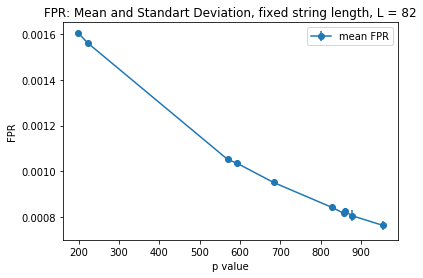

In [31]:
plt.errorbar(p_10, means_fixed_L, stds_fixed_L, fmt='-o', label='mean FPR')
plt.title('FPR: Mean and Standart Deviation, fixed string length, L = %d' % rand_L)
plt.xlabel('p value')
plt.ylabel('FPR')
plt.legend()
plt.show()

Мы действительно получаем уменьшение коллизий при возрастании `p` ($O(\frac 1 m + \frac L p)$) по гиперболе.